In [343]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

Let's work with the **breast cancer dataset** provided by scikit-learn

In [344]:
from sklearn.datasets import load_breast_cancer

In [345]:
cancer = load_breast_cancer()

In [346]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [347]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [348]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Let's create the DataFrame

In [349]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [350]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As we can see it's got tons of features. What we're gonna do is to try different supervised learning algorithms to do predictions and see how well each of them perform. Then we're gonna apply PCA and reduce the features to only 2 and repeat the process with those two features. Following we're gonna use a fully connected NN to create and Autoencoder and try to reduce the dimensions to also 2 and again try different supervised learning algorithms to do predictions.

## Let's get started

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Before be start, let's scale the data using StandardScaler

In [352]:
from sklearn.preprocessing import StandardScaler

In [353]:
scaler = StandardScaler()

In [354]:
scaled_df = scaler.fit_transform(df)

In [355]:
scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Following we'll do the same train/test split for all the algorithms

In [356]:
# If you wanna see what happens if you don't scale the values switch them
# X = df
X = scaled_df
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Logistic Regression

In [357]:
from sklearn.linear_model import LogisticRegression

In [358]:
model = LogisticRegression()

In [359]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [360]:
y_pred = model.predict(X_test)

In [361]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        65
          1       0.99      1.00      1.00       106

avg / total       0.99      0.99      0.99       171



In [362]:
print(confusion_matrix(y_test, y_pred))

[[ 64   1]
 [  0 106]]


In [363]:
accuracy_score(y_test, y_pred)

0.9941520467836257

# K Nearest Neighbors

In [364]:
from sklearn.neighbors import KNeighborsClassifier

Since we need a K value, let's use the Elbow method to find the optimal one

In [365]:
error_rate = []

for k in range(2, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

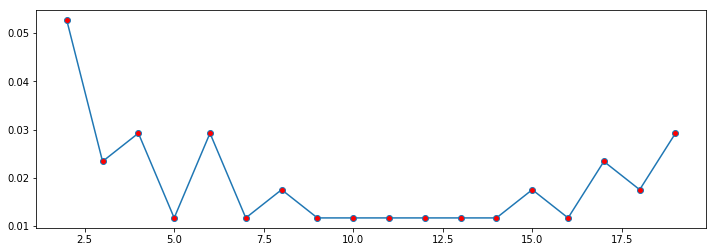

In [366]:
plt.figure(figsize=(12, 4))
plt.plot(range(2, 20), error_rate, marker='o', markerfacecolor='red')

Looks like K = 7 could be a good option

In [367]:
model = KNeighborsClassifier(n_neighbors=7)

In [368]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [369]:
y_pred = model.predict(X_test)

In [370]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        65
          1       0.99      0.99      0.99       106

avg / total       0.99      0.99      0.99       171



In [371]:
print(confusion_matrix(y_test, y_pred))

[[ 64   1]
 [  1 105]]


In [372]:
accuracy_score(y_test, y_pred)

0.9883040935672515

# Decision trees

In [373]:
from sklearn.tree import DecisionTreeClassifier

In [374]:
model = DecisionTreeClassifier()

In [375]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [376]:
y_pred = model.predict(X_test)

In [377]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.94      0.92        65
          1       0.96      0.94      0.95       106

avg / total       0.94      0.94      0.94       171



In [378]:
print(confusion_matrix(y_test, y_pred))

[[ 61   4]
 [  6 100]]


In [379]:
accuracy_score(y_test, y_pred)

0.9415204678362573

# Random Forests

In [380]:
from sklearn.ensemble import RandomForestClassifier

In [381]:
model = RandomForestClassifier(n_estimators=100)

In [382]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [383]:
y_pred = model.predict(X_test)

In [384]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96        65
          1       0.98      0.97      0.98       106

avg / total       0.97      0.97      0.97       171



In [385]:
print(confusion_matrix(y_test, y_pred))

[[ 63   2]
 [  3 103]]


In [386]:
accuracy_score(y_test, y_pred)

0.9707602339181286

# Support Vector Machines

In [387]:
from sklearn.svm import SVC

In [388]:
model = SVC()

In [389]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [390]:
y_pred = model.predict(X_test)

In [391]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        65
          1       0.99      0.99      0.99       106

avg / total       0.99      0.99      0.99       171



In [392]:
print(confusion_matrix(y_test, y_pred))

[[ 64   1]
 [  1 105]]


In [393]:
accuracy_score(y_test, y_pred)

0.9883040935672515

## Gridsearch

In [394]:
from sklearn.model_selection import GridSearchCV

In [395]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [396]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

In [397]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [398]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [399]:
y_pred = grid.predict(X_test)

In [400]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        65
          1       0.99      1.00      1.00       106

avg / total       0.99      0.99      0.99       171



In [401]:
print(confusion_matrix(y_test, y_pred))

[[ 64   1]
 [  0 106]]


In [402]:
accuracy_score(y_test, y_pred)

0.9941520467836257

Next, let's reduce dimensions down to 2

# Principal Component Analysis

In [403]:
from sklearn.decomposition import PCA

In [404]:
pca = PCA(n_components=2)

In [405]:
X_pca = pca.fit_transform(scaled_df)

In [406]:
X_pca.shape

(569, 2)

Now we can plot it in a scatter plot

Text(0,0.5,'Second Principal Component')

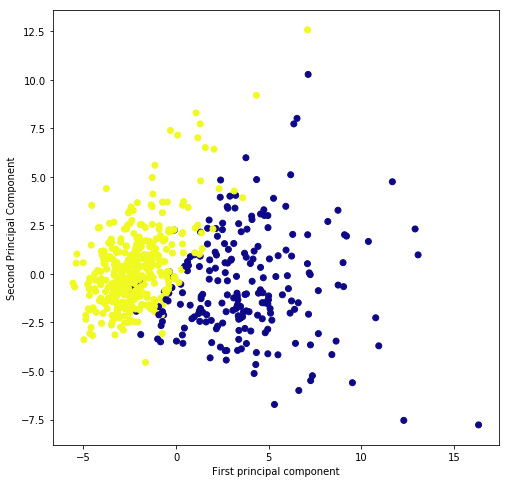

In [407]:
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer['target'], cmap='plasma', )
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Next we repeat the process, this time with this dataset (only two features)

## Train Test split

In [408]:
X = X_pca
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Let's get ready some parameters to plot the decision boundaries

In [430]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Logistic Regression

In [431]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.98      0.86      0.92        74
          1       0.91      0.99      0.95        97

avg / total       0.94      0.94      0.94       171

[[64 10]
 [ 1 96]]


0.935672514619883

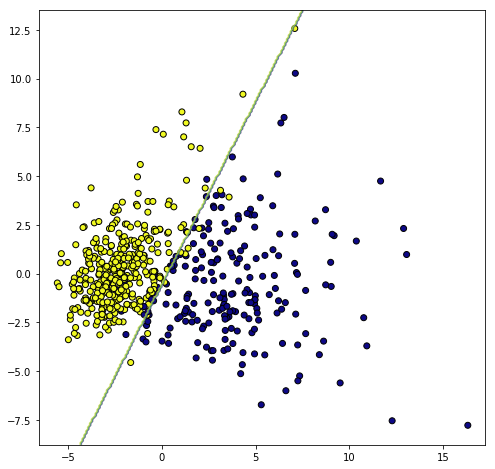

In [432]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))
plt.contour(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer['target'], cmap='plasma', edgecolor='k')

# K Nearest Neighbors

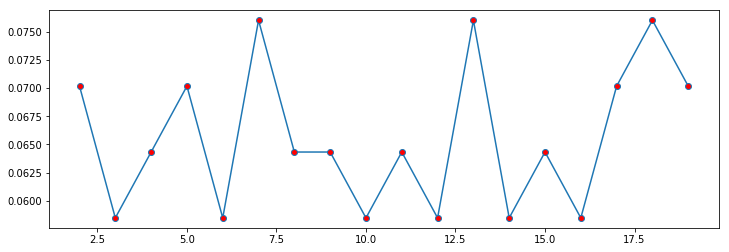

In [433]:
error_rate = []

for k in range(2, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(12, 4))
plt.plot(range(2, 20), error_rate, marker='o', markerfacecolor='red')

Not very clear. Let's simply choose K = 6

In [434]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.96      0.91      0.93        74
          1       0.93      0.97      0.95        97

avg / total       0.94      0.94      0.94       171

[[67  7]
 [ 3 94]]


0.9415204678362573

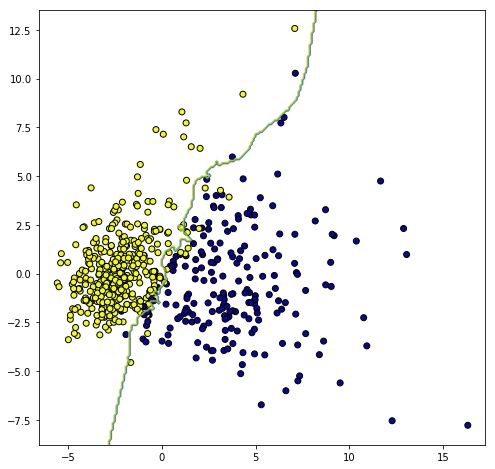

In [435]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))
plt.contour(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer['target'], cmap='plasma', edgecolor='k')

# Decision trees

In [436]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.93      0.88      0.90        74
          1       0.91      0.95      0.93        97

avg / total       0.92      0.92      0.92       171

[[65  9]
 [ 5 92]]


0.9181286549707602

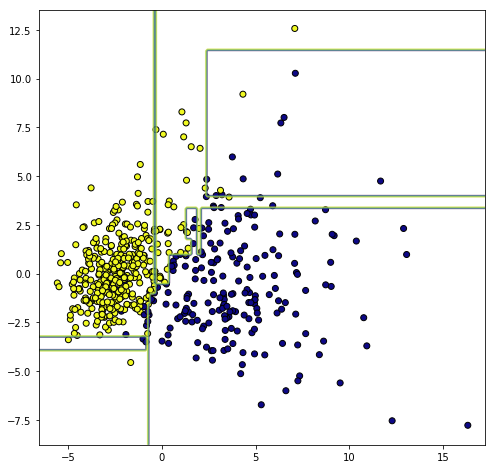

In [437]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))
plt.contour(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer['target'], cmap='plasma', edgecolor='k')

# Random Forests

In [438]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.94      0.89      0.92        74
          1       0.92      0.96      0.94        97

avg / total       0.93      0.93      0.93       171

[[66  8]
 [ 4 93]]


0.9298245614035088

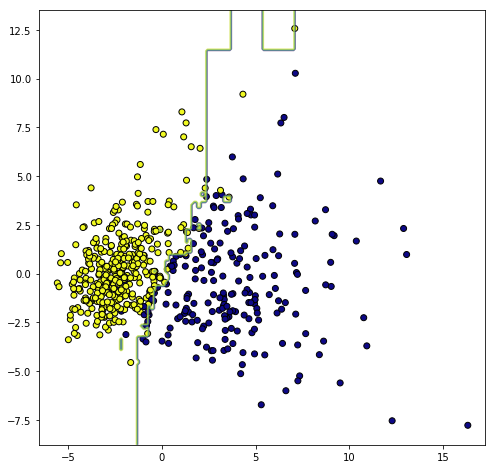

In [439]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))
plt.contour(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer['target'], cmap='plasma', edgecolor='k')

# Support Vector Machines

In [440]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.94      0.89      0.92        74
          1       0.92      0.96      0.94        97

avg / total       0.93      0.93      0.93       171

[[66  8]
 [ 4 93]]


0.9298245614035088

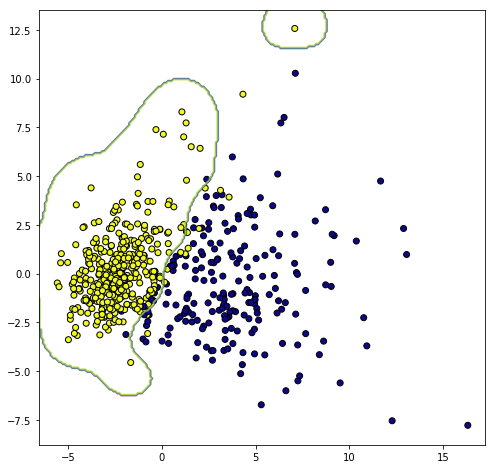

In [441]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))
plt.contour(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer['target'], cmap='plasma', edgecolor='k')

## Gridsearch

In [442]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [443]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [444]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.94      0.89      0.92        74
          1       0.92      0.96      0.94        97

avg / total       0.93      0.93      0.93       171

[[66  8]
 [ 4 93]]


0.9298245614035088

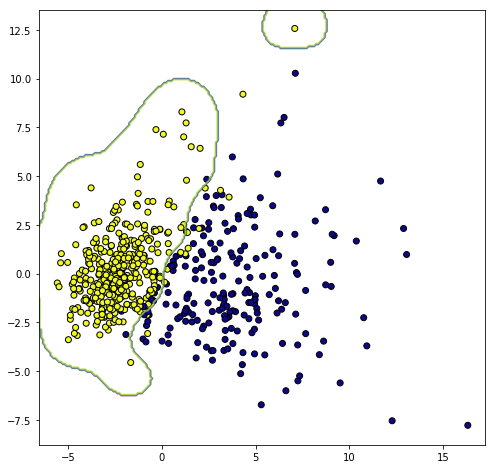

In [445]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))
plt.contour(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer['target'], cmap='plasma', edgecolor='k')